## Importing necessary libriaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 

## Definitions of Reward function Rt 

In [2]:
def reward_fcn(d, theta=None, Rmax=1, dmax=20, d_val_1=2, select_fcn='gauss'):
    
    angle_penalty = abs(np.cos(np.deg2rad(theta))) if theta != None else 1.0

    if d >= dmax:
        Rt = -Rmax
    
    if select_fcn == 'lin':

        if d >= d_val_1 and d < dmax :
            Rt = (-1.0/(dmax-d_val_1))*d + dmax/(dmax-d_val_1)
            
        elif d >= 0 and d < d_val_1:
            Rt = (1-Rmax)*d/float(d_val_1) + Rmax
            
        Rt *= angle_penalty
        
    elif select_fcn == 'gauss':
        
        global SIGMA
        
        if d < dmax :
            Rt = Rmax*np.exp(-d**2/(2*SIGMA**2))*angle_penalty
            
    return Rt    


## Defining parameters for this analysis 

In [3]:
num_points = 1000

d = np.linspace(0,19,num_points)

reward_dict = {'lin': ['Part-by-part linear Rt(d,$\\theta$)','tomato'],
               'gauss': ['Gauss-like Rt(d,$\\theta$)', 'darkgreen']}

SIGMA = 7.0

all_rewards = list(reward_dict.keys())

## Distance influence on reward function Rt

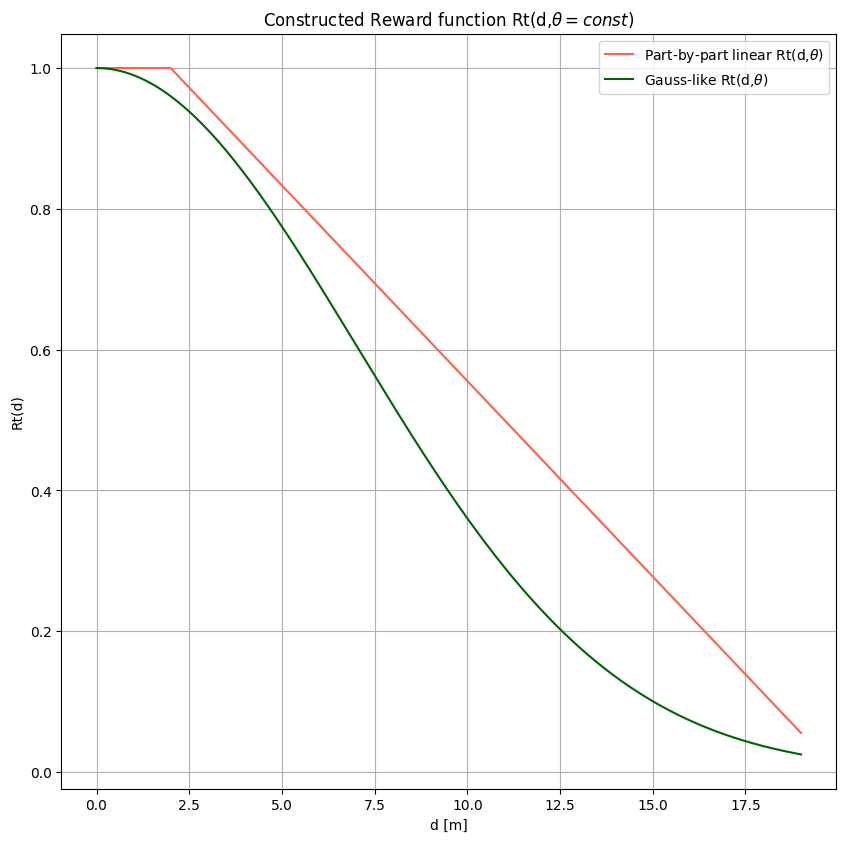

In [4]:
Rt = np.zeros((len(all_rewards), num_points))

fig = plt.figure(figsize=(10,10), dpi=100)

for i in range(len(all_rewards)):    
    for j in range(num_points):
        Rt[i,j] = reward_fcn(d[j], select_fcn=all_rewards[i])
        
    plt.plot(d, Rt[i], color=reward_dict[all_rewards[i]][1], linewidth=1.5, label=reward_dict[all_rewards[i]][0])

plt.title('Constructed Reward function Rt(d,$\\theta=const)$')
plt.xlabel('d [m]')
plt.ylabel('Rt(d)')
plt.legend()
plt.grid()
fig.savefig(os.getcwd()+'/reward_plot_distance.png', facecolor = 'white', bbox_inches='tight')

## Distance and angle influence on reward function Rt -> |cos(theta)|

In [5]:
theta = np.arange(0,360,30)
Rt_1 = np.zeros((len(all_rewards), num_points, num_points))

for i in range(len(all_rewards)):    
    for j in range(num_points):
        for k in range(theta.shape[0]):
            Rt_1[i,j,k] = reward_fcn(d[j], theta=theta[k], select_fcn=all_rewards[i])

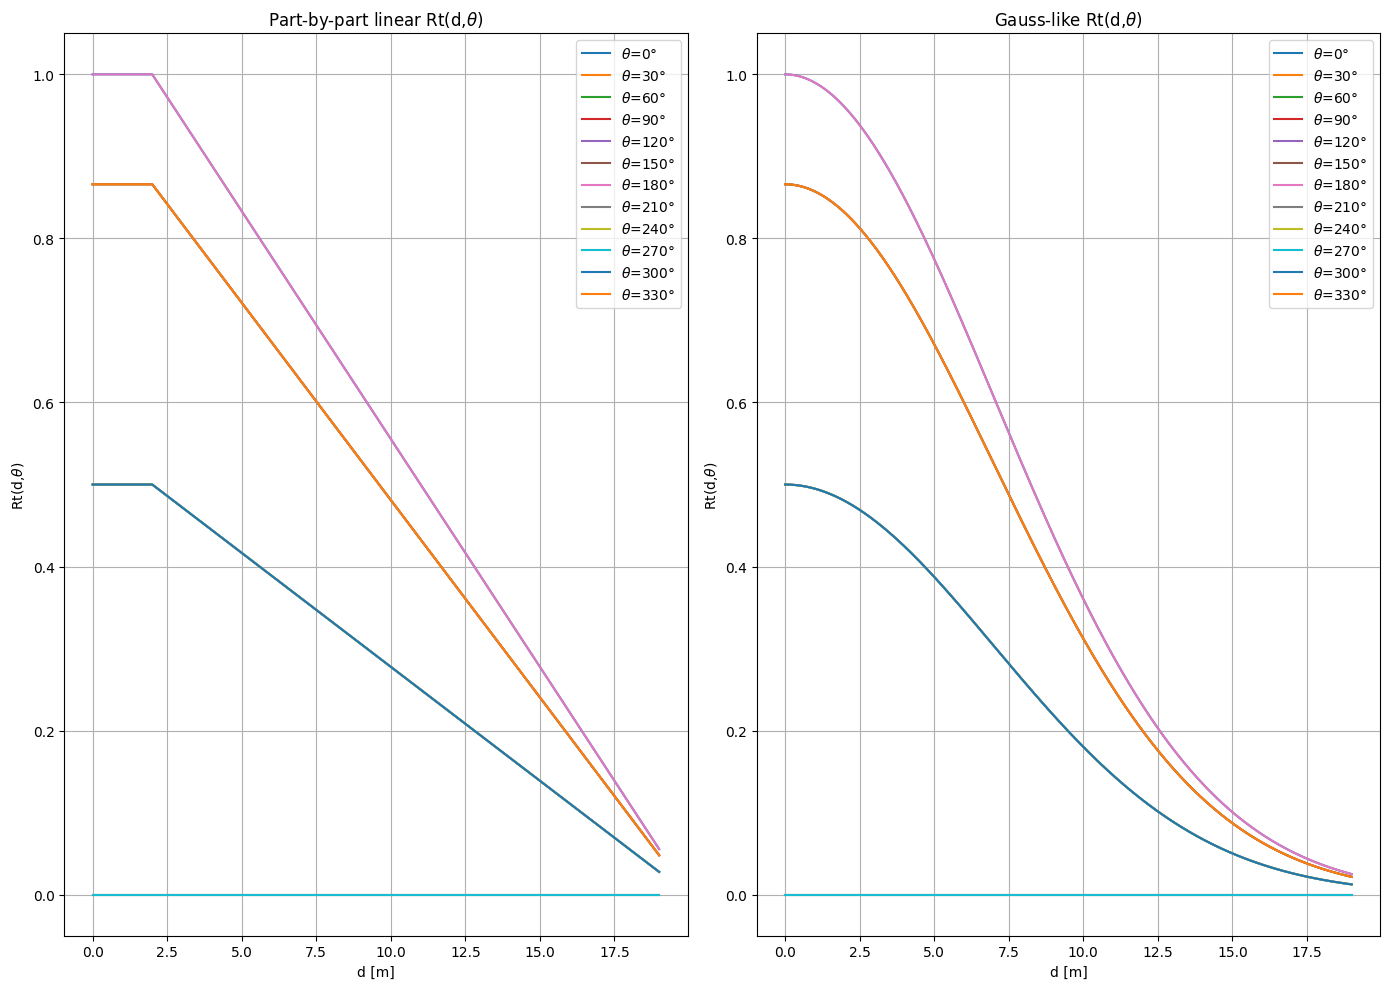

In [6]:
fig, axes = plt.subplots(ncols = len(all_rewards), nrows = 1, figsize=(14,10), dpi=100)
ax = axes.ravel()

for i in range(len(all_rewards)):  
    for j in range(theta.shape[0]):
        ax[i].plot(d, Rt_1[i,:,j], linewidth=1.5, label='$\\theta$=' + str(theta[j])+'\N{DEGREE SIGN}')
        
    ax[i].set_title(reward_dict[all_rewards[i]][0])
    ax[i].set_xlabel('d [m]')
    ax[i].set_ylabel('Rt(d,$\\theta$)')
    ax[i].legend()
    ax[i].grid()
        
plt.tight_layout()
fig.savefig(os.getcwd()+'/reward_plot_distance_and_abs_angle.png', facecolor = 'white', bbox_inches='tight')